## Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

## Loading the Dataset 
### We are using Bangalore weather Dataset for our weather prediction analysis. 

In [2]:
weather_data = pd.read_csv("bangalore.csv")
weather_data

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,18,11,2,91,0.0,1014,14,10,109,8
1,2009-01-01 01:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,17,9,2,93,0.0,1014,14,7,85,6
2,2009-01-01 02:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,16,7,2,94,0.0,1014,13,5,61,4
3,2009-01-01 03:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,15,5,2,96,0.0,1014,12,2,37,3
4,2009-01-01 04:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,18,5,1,88,0.0,1015,14,5,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96427,2020-01-01 19:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,23,22,74,76,0.1,1014,23,10,107,16
96428,2020-01-01 20:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,22,23,73,81,0.6,1015,22,9,106,16
96429,2020-01-01 21:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,21,25,72,86,0.8,1016,21,9,105,17
96430,2020-01-01 22:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,20,24,69,88,0.4,1016,20,10,106,16


In [3]:
weather_data.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,18,11,2,91,0.0,1014,14,10,109,8
1,2009-01-01 01:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,17,9,2,93,0.0,1014,14,7,85,6
2,2009-01-01 02:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,16,7,2,94,0.0,1014,13,5,61,4
3,2009-01-01 03:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,15,5,2,96,0.0,1014,12,2,37,3
4,2009-01-01 04:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,18,5,1,88,0.0,1015,14,5,45,3


In [4]:
weather_data.tail()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
96427,2020-01-01 19:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,23,22,74,76,0.1,1014,23,10,107,16
96428,2020-01-01 20:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,22,23,73,81,0.6,1015,22,9,106,16
96429,2020-01-01 21:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,21,25,72,86,0.8,1016,21,9,105,17
96430,2020-01-01 22:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,20,24,69,88,0.4,1016,20,10,106,16
96431,2020-01-01 23:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,20,24,66,89,0.5,1016,20,10,108,16


In [5]:
# Dropping the unnecessary columns
#weather_data = weather_data.drop(['totalSnow_cm','uvIndex.1', 'moon_illumination', 'moonrise','moonset', 'WindChillC', 'WindGustKmph'], axis=1)

In [6]:
#weather_data = weather_data.drop(['tempC', 'visibility','winddirDegree', 'sunrise','FeelsLikeC','HeatIndexC','visibility'], axis=1)

In [7]:
weather_data

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,18,11,2,91,0.0,1014,14,10,109,8
1,2009-01-01 01:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,17,9,2,93,0.0,1014,14,7,85,6
2,2009-01-01 02:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,16,7,2,94,0.0,1014,13,5,61,4
3,2009-01-01 03:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,15,5,2,96,0.0,1014,12,2,37,3
4,2009-01-01 04:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,18,5,1,88,0.0,1015,14,5,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96427,2020-01-01 19:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,23,22,74,76,0.1,1014,23,10,107,16
96428,2020-01-01 20:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,22,23,73,81,0.6,1015,22,9,106,16
96429,2020-01-01 21:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,21,25,72,86,0.8,1016,21,9,105,17
96430,2020-01-01 22:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,20,24,69,88,0.4,1016,20,10,106,16


<Axes: >

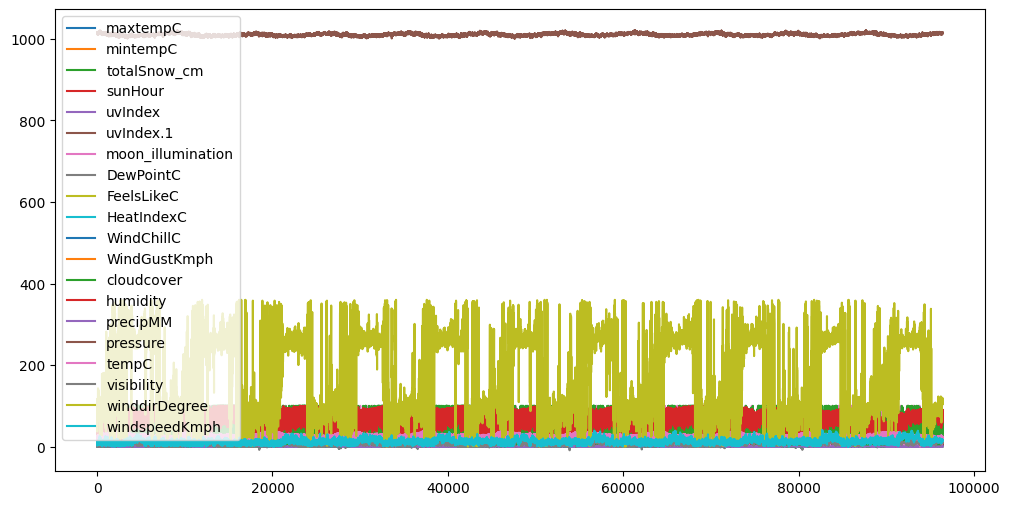

In [8]:
weather_data.plot(figsize=(12,6))

## Preprocessing: extracting relevant features and scaling the data.
### We are using "maxtempC", "mintempC", sunHour", "uvIndex", "cloudcover", "humidity", "precipMM", "pressure" parameters for weather forecasting.

In [9]:
features = ["maxtempC", "precipMM", "mintempC", "sunHour", "uvIndex", "cloudcover", "humidity","pressure"]
weather_data = weather_data[features]
scaler = MinMaxScaler()
weather_data = scaler.fit_transform(weather_data)

## Spliting the dataset into training and testing part.

###  We are using 80% of data for our traing part and rest 20% is for the testing and evaluation part.

In [10]:
train_size = int(len(weather_data) * 0.8)
train_data, test_data = weather_data[:train_size], weather_data[train_size:]

## Defining a function to create time series dataset.

In [11]:
def create_dataset(weather_data, look_back=1):
    X, Y = [], []
    for i in range(len(weather_data) - look_back):
        X.append(weather_data[i:i+look_back])
        Y.append(weather_data[i+look_back])
    return np.array(X), np.array(Y)

## Creating time series datasets for training and testing.

In [12]:
look_back = 30 # number of past days to use as input
train_X, train_Y = create_dataset(train_data, look_back)
test_X, test_Y = create_dataset(test_data, look_back)

## Reshaping input data for LSTM (samples, time steps, features)

In [13]:
look_back = 30 # number of past days to use as input
train_X, train_Y = create_dataset(train_data, look_back)
test_X, test_Y = create_dataset(test_data, look_back)

## Reshaping input data for LSTM (samples, time steps, features)

In [14]:
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], len(features)))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], len(features)))

## Building the LSTM model.

In [15]:
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, len(features))))
model.add(Dense(len(features)))
model.compile(loss="mean_squared_error", optimizer="adam")

c:\Users\HP\Documents\My projects\Weather-Forecasting-Model-Team-Enerwave\myvenv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        11,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           408 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,208 (47.69 KB)

 Trainable params: 12,208 (47.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Define the validation size (e.g., 20% of the training data)
val_size = int(len(train_X) * 0.2)
val_X, val_Y = train_X[-val_size:], train_Y[-val_size:]
train_X, train_Y = train_X[:-val_size], train_Y[:-val_size]
# train the model and store the history
history = model.fit(train_X, train_Y, epochs=100, batch_size=32, validation_data=(val_X, val_Y), verbose=2)


Epoch 1/100
1928/1928 - 32s - 17ms/step - loss: 0.0042 - val_loss: 0.0011
Epoch 2/100
1928/1928 - 26s - 13ms/step - loss: 9.9933e-04 - val_loss: 6.7121e-04
Epoch 3/100
1928/1928 - 26s - 13ms/step - loss: 7.7013e-04 - val_loss: 6.0864e-04
Epoch 4/100
1928/1928 - 42s - 22ms/step - loss: 7.1321e-04 - val_loss: 5.8355e-04
Epoch 5/100
1928/1928 - 30s - 16ms/step - loss: 6.8624e-04 - val_loss: 6.2020e-04
Epoch 6/100
1928/1928 - 27s - 14ms/step - loss: 6.6729e-04 - val_loss: 5.5770e-04
Epoch 7/100
1928/1928 - 25s - 13ms/step - loss: 6.5395e-04 - val_loss: 5.4042e-04
Epoch 8/100
1928/1928 - 25s - 13ms/step - loss: 6.4239e-04 - val_loss: 5.4834e-04
Epoch 9/100
1928/1928 - 25s - 13ms/step - loss: 6.3360e-04 - val_loss: 6.1076e-04
Epoch 10/100
1928/1928 - 25s - 13ms/step - loss: 6.2476e-04 - val_loss: 5.4257e-04
Epoch 11/100
1928/1928 - 26s - 13ms/step - loss: 6.1986e-04 - val_loss: 5.2017e-04
Epoch 12/100
1928/1928 - 42s - 22ms/step - loss: 6.1639e-04 - val_loss: 5.3284e-04
Epoch 13/100
1928/192

NameError: name 'plt' is not defined

In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
# Compile the model with MSE as a metric
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])


# Plot the training and validation MSE
plt.plot(history.history['mean_squared_error'], label='Training MSE')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')

# Add title and axis labels
plt.title('Model MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')

# Add a legend
plt.legend()

# Show the plot
plt.show()


KeyError: 'mse'

In [19]:
# Save the model in the Keras format (HDF5 format)
model.save('weather_forecasting_model.keras')

## Evaluating the model on test data

In [ ]:
test_loss = model.evaluate(test_X, test_Y, verbose=0)
print("Test loss:", test_loss)

## Making the predictions on test data.

In [ ]:
predictions = model.predict(test_X)

## Calculating the r2 and RMSE for checking the accuracy of the model.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# calculate R2
r2 = r2_score(test_Y, predictions)
print("R2 score:", r2)

# calculate RMSE
rmse = np.sqrt(mean_squared_error(test_Y, predictions))
print("RMSE:", rmse)

In [ ]:
# inverse scale the predictions and actual values
predictions = scaler.inverse_transform(predictions)
test_Y = scaler.inverse_transform(test_Y)
# print example predictions and actual values
print("Predictions:", predictions[0])
print("Actual values:", test_Y[0])

In [ ]:
import matplotlib.pyplot as plt

# extract actual and predicted maxtempC values
actual_maxtempC = test_Y[:,0]
predicted_maxtempC = predictions[:,0]

# create a time axis for the test data
test_time = weather_data[train_size+look_back:, 0]

# plot the actual and predicted values of maxtempC
plt.plot(test_time, actual_maxtempC, label="Actual")
plt.plot(test_time, predicted_maxtempC, label="Predicted")

plt.title("Actual vs Predicted MaxtempC")
plt.xlabel("Date")
plt.ylabel("MaxtempC")
plt.legend()

plt.show()

In [ ]:
import matplotlib.pyplot as plt

# inverse scale the predictions and actual values
predictions = scaler.inverse_transform(predictions)
test_Y = scaler.inverse_transform(test_Y)

# extract the actual and predicted values of sunHour
actual_sunhour = test_Y[:,2]
predicted_sunhour = predictions[:,2]

# create a time axis for the test data
test_time = weather_data[train_size+look_back:,0]

# plot the actual and predicted values of sunHour
plt.plot(test_time, actual_sunhour, label="Actual")
plt.plot(test_time, predicted_sunhour, label="Predicted")

plt.xlabel("Date")
plt.ylabel("Sun Hours")
plt.title("Actual vs. Predicted Sun Hours")
plt.legend()
plt.show()

In [ ]:
# get the most recent 30 days of data
recent_data = weather_data[-look_back:]

# scale the recent data
recent_data = scaler.transform(recent_data)

# reshape input data for LSTM (samples, time steps, features)
recent_data = np.reshape(recent_data, (1, look_back, len(features)))

# make predictions for the next 12 hours
forecast = []
for i in range(12):
    prediction = model.predict(recent_data)
    forecast.append(prediction[0])
    recent_data = np.append(recent_data[:,1:,:], prediction.reshape(1,1,len(features)), axis=1)

# inverse scale the forecast
forecast = scaler.inverse_transform(forecast)

# print the forecast
print("Forecast for the next 12 hours:")
for i in range(12):
    print("Hour", i+1, ":", forecast[i])